In [1]:
# import the library
%matplotlib inline

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression

# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# NANs

In [3]:
#print(df_train.dtypes)
#print(df_train['review_scores_rating'].describe())
#print(df_train.head(5))

print(df_train.shape, df_test.shape)
print(df_train.columns)
#checking for the NAN
print('Number of NAN per feature: \n', df_train.isnull().sum())

(51000, 29) (23111, 28)
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
Number of NAN per feature: 
 id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profi

### Select the and reassign df_train to df

In [4]:
X_columns = ['id', 'room_type', 'neighbourhood', 'review_scores_rating', 'zipcode', 'amenities', 'accommodates', 'bedrooms', 'cleaning_fee', 'city', 'latitude', 'longitude', 'number_of_reviews', 'property_type', 'cancellation_policy', 'bathrooms']
y_column = ['log_price']

df = df_train[X_columns + y_column].copy()
df_test = df_test[X_columns].copy()
print(df.shape)

#checking for the NANs
print('Number of NAN per feature in df: \n', df.isnull().sum())
print('Number of NAN per feature in df_test: \n', df_test.isnull().sum())

(51000, 17)
Number of NAN per feature in df: 
 id                          0
room_type                   0
neighbourhood            4675
review_scores_rating    11450
zipcode                   645
amenities                   0
accommodates                0
bedrooms                   63
cleaning_fee                0
city                        0
latitude                    0
longitude                   0
number_of_reviews           0
property_type               0
cancellation_policy         0
bathrooms                 133
log_price                   0
dtype: int64
Number of NAN per feature in df_test: 
 id                         0
room_type                  0
neighbourhood           2197
review_scores_rating    5272
zipcode                  321
amenities                  0
accommodates               0
bedrooms                  28
cleaning_fee               0
city                       0
latitude                   0
longitude                  0
number_of_reviews          0
property_type

# Feature Engineering 

### host_since

Didn't improve prediction

In [5]:
# for item in [df, df_test]:
#     item.groupby('host_since')['id'].count()
#     item['host_since'] = pd.to_datetime(item['host_since'])
#     item['host_since'] = item['host_since'].dt.year

#     item['host_since'] = item['host_since'].fillna(0)
#     item['host_since'] = [int(i) for i in item['host_since'] ]

In [6]:
# list_host_df = list(df['host_since'].unique())
# list_host_df_test = list(df_test['host_since'].unique())
# list_host_unique = list(set(list_host_df + list_host_df_test))

# list_host_unique = [incom for incom in list_host_unique if incom != 0]

# print(sorted(df['host_since'].unique()))
# print(sorted(df_test['host_since'].unique()))
# print(sorted(list_host_unique)) # All the same for both df and df_test

In [7]:
# df_host = pd.get_dummies(df['host_since'])
# df = pd.concat([df, df_host], axis=1)
# del df['host_since']

# df_host_test = pd.get_dummies(df_test['host_since'])
# df_test = pd.concat([df_test, df_host_test], axis=1)
# del df_test['host_since']

# print(df.head(1))
# print(df_test.head(1))

### neighbourhood

In [8]:
df.groupby('neighbourhood')['id'].count()

neighbourhood
16th Street Heights               62
Adams Morgan                     141
Alamo Square                      67
Albany Park                       14
Alhambra                          56
Allerton                           7
Allston-Brighton                 279
Alondra Park                       1
Alphabet City                    416
Altadena                          72
American University Park          13
Anacostia                         23
Andersonville                     26
Annadale                           1
Arboretum                          1
Arcadia                           52
Archer Heights                     2
Arleta                             3
Armour Square                      3
Artesia                            1
Arts District                     37
Ashburn                            1
Astoria                          642
Atwater Village                   57
Auburn Gresham                     2
Austin                             3
Avondale                

Getting the list of heighbourhoods

In [9]:
list_neig_df = list(df['neighbourhood'].unique())
list_neig_df_test = list(df_test['neighbourhood'].unique())
list_neig_unique = list(set(list_neig_df + list_neig_df_test))
list_neig_unique = [incom for incom in list_neig_unique if str(incom) != 'nan']

In [10]:
list_creator = lambda col, element: [1 if element == i else 0 for i in col]
for item in [df, df_test]:
    for i in range(len(list_neig_unique)):
        
        item[list_neig_unique[i]] = list_creator(item['neighbourhood'],list_neig_unique[i]) 
    del item['neighbourhood']

df_test.head(5)

,id,room_type,review_scores_rating,zipcode,amenities,accommodates,bedrooms,cleaning_fee,city,latitude,...,River West,East Elmhurst,Willowbrook,Pullman,Little Italy/UIC,Fort Greene,Andersonville,Edenwald,Georgetown,Near Northeast/H Street Corridor
0,986942,Private room,100.0,10031,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,False,NYC,40.830190,...,0,0,0,0,0,0,0,0,0,0
1,16436737,Private room,96.0,20009,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.0,True,DC,38.923224,...,0,0,0,0,0,0,0,0,0,0
2,18209634,Private room,92.0,11225.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,True,NYC,40.668250,...,0,0,0,0,0,0,0,0,0,0
3,15027024,Private room,NaN,11225.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,False,NYC,40.668870,...,0,0,0,0,0,0,0,0,0,0
4,18074243,Entire home/apt,93.0,11377,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,2.0,True,NYC,40.741597,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Deleting useless columns
useless_neig = ['Echo Park', 'Mount Pleasant', 'Villa', 'The Castro', 'Murray Hill', 'Westchester/Playa Del Rey', 'Soho', 'Gardena', 'Irving Park', 'Bay Ridge', 'East Flatbush', 'Navy Yard', 'Sunset Park', 'Brentwood', 'South Robertson', 'East Hollywood', 'Flushing', 'Fort Greene', 'Outer Sunset', 'Del Rey', 'Barney Circle', 'South Boston', 'Kalorama', 'Hyde Park', 'Noe Valley', 'Nob Hill', 'Southwest Waterfront', 'Union Square', 'Bungalow', 'Glendale', 'Downtown/Penn Quarter', 'The Rockaways', 'Inglewood', 'Excelsior', 'Hayes Valley', 'Fairlawn', 'Shepherd Park', 'Kensington', '16th Street Heights', 'Highland Park', 'Visitacion Valley', 'Bellflower', 'Bronzeville', 'Mott Haven', 'Eagle Rock', 'Potrero Hill', 'Canarsie', 'Windsor Terrace', 'Burbank', 'Loop', 'Hermosa Beach', 'Los Feliz', 'Noho', 'Ditmars / Steinway', 'Bel Air/Beverly Crest', 'Alhambra', 'Hostel', 'Edgewood', 'Civic Center', 'Jamaica Plain', 'Inner Sunset', 'North End', 'Logan Square', 'Elmhurst', 'Brooklyn Heights', 'Times Square/Theatre District', 'Richmond Hill', 'Temple City', 'Sherman Oaks', 'Gold Coast', 'Jackson Heights', 'Shaw', 'Haight-Ashbury', 'Woodley Park', 'Bloomingdale', 'Van Nuys', 'Timeshare', 'Brookland', 'Gramercy Park', 'El Sereno', 'Inwood', 'Mid-City', 'Atwater Village', 'Prospect Heights', 'Midwood', 'Guest suite', 'Altadena', 'Culver City', 'Mount Vernon Square', 'Crestwood', 'Mission Hill', 'Rogers Park', 'North Beach', 'Nolita', 'Cobble Hill', 'Bayview', 'Trinidad', 'Boerum Hill', 'Boutique hotel', 'Mount Washington', 'Wicker Park', 'Tarzana', 'Little Village', 'Baldwin Hills', 'South Shore', 'Palms', 'Torrance', 'Greenwood Heights', 'Woodridge', 'Flatlands', 'Petworth', 'Marshall Heights', 'Brooklyn Navy Yard', 'Gravesend', 'Lincoln Square', 'Mission Bay', 'Cabin', 'Carroll Gardens', 'Westlake', 'Foggy Bottom', 'South Loop/Printers Row', 'South Pasadena', 'Avondale', 'River North', 'Andersonville', 'Mattapan', 'Monterey Park', 'Near North Side', 'Glover Park', 'Valley Glen', 'Williamsbridge', 'Park View', 'Eckington', 'Parkside', 'Toluca Lake', 'Judiciary Square', 'Valley Village', 'Long Island City', 'Montebello', 'Bensonhurst', 'Corona', 'Sheepshead Bay', 'Pilsen', 'Meatpacking District', 'Gowanus', 'Woodland Hills/Warner Center', 'Tribeca', 'Red Hook', 'Charlestown', 'Maspeth', 'Oceanview', 'Downtown Brooklyn', 'Duboce Triangle', 'Wakefield', 'Carver Langston', 'Tremont', 'Roslindale', 'Cleveland Park', 'Tenderloin', 'East Los Angeles', 'Van Nest', 'Streeterville', 'Lamond Riggs', 'Manor Park', 'Boyle Heights', 'Stapleton', 'Telegraph Hill', 'West Loop/Greektown', 'Dyker Heights', 'Glassell Park', 'San Gabriel', 'Russian Hill', 'LeDroit Park', 'Takoma', 'Boystown', 'Edgewater', 'Beacon Hill', 'Presidio Heights', 'Woodside', 'Brownsville', 'In-law', 'Panorama City', 'Arcadia', 'Alamo Square', 'Twin Peaks', 'Palisades', 'Lakewood', 'Theater District', 'Friendship Heights', 'Hudson Square', 'Baychester', 'San Marino', 'Reseda', 'DUMBO', 'Lake Balboa', 'Ozone Park', 'Brighton Beach', 'Cow Hollow', 'Little Italy/UIC', 'Old Town', 'Good Hope', 'West Ridge', 'Mission Terrace', 'Hawthorne', 'Harbor Gateway', 'Carson', 'Riverdale', 'Pleasant Hill', 'Roscoe Village', 'West Town/Noble Square', 'Port Morris', 'Encino', 'Benning Ridge', 'Montecito Heights', 'Lomita', 'City Island', 'Woodhaven', 'Roosevelt Island', 'Little Italy', 'Serviced apartment', 'Ukrainian Village', 'Manhattan', 'El Monte', 'Bucktown', 'West Roxbury', 'Cole Valley', 'Northridge', 'Harbor City', 'Pacoima', 'Garfield Park', 'Deanwood', 'Glen Park', 'Balboa Terrace', "Fisherman's Wharf", 'Lakeshore', 'La Canada Flintridge', 'Kingsbridge', 'Cathedral Heights', 'Crocker Amazon', 'St. George', 'Sunland/Tujunga', 'Sea Cliff', 'Pleasant Plains', 'Throgs Neck', 'Stronghold', 'South Chicago', 'Albany Park', 'Battery Park City', 'Morris Heights', 'River West', 'Parkchester', 'American University Park', 'Benning', 'Longwood', 'Co-op City', 'East Elmhurst', 'Colonial Village', 'Chevy Chase', 'Chatham', 'Presidio', 'Claremont', 'Bayside', 'Greenway', 'River Terrace', 'Woodlawn', 'Burleith', 'Benning Heights', 'El Segundo', 'Forest Hill', 'Monterey Hills', 'North Cleveland Park', 'Cypress Park', 'Norwalk', 'Whittier', 'Norwood Park', 'Jefferson Park', 'Canoga Park', 'North Center', 'Brightwood', 'Kingsbridge Heights', 'Truxton Circle', 'Rego Park', 'Concourse', 'Bedford Park', 'Columbia Street Waterfront', 'Downtown Crossing', 'Palos Verdes', 'Soundview', 'Belmont', 'Hawaiian Gardens', 'Borough Park', 'Anacostia', 'Winnetka', 'West Lawn', 'Fort Totten', 'La Crescenta-Montrose', 'Bronxdale', 'Brooklyn', 'Bridgeport', 'Downey', 'Dogpatch', 'Norwood', 'Foxhall', 'Sierra Madre', 'Vernon', 'Highbridge', 'La Mirada', 'Kew Garden Hills', 'Granada Hills North', 'College Point', 'Congress Heights', 'Englewood', 'Morgan Park', 'Pelham Bay', 'Wesley Heights', 'University Heights', 'Lawndale', 'South Ozone Park', 'Spring Valley', 'North Michigan Park', 'Great Kills', 'East San Gabriel', 'Monrovia', 'Portage Park', 'South Street Seaport', 'Coney Island', 'Grasmere', 'Sun Valley', 'South Gate', 'West Puente Valley', 'Buena Vista', 'West Elsdon', 'Middle Village', 'Hermosa', 'Central Northeast/Mahaning Heights', 'Michigan Park', 'Elysian Valley', 'Chestnut Hill', 'Ingleside', 'Skid Row', 'Lindenwood', 'Hermon', 'Watts', 'Fort Lincoln', 'Rosemead', 'Bath Beach', 'Arts District', 'Gallaudet', 'Hillcrest', 'Takoma Park, MD', 'Pico Rivera', 'Kent', 'Edenwald', 'Sea Gate', 'South Whittier', 'Compton', 'Castle Hill ', 'Diamond Heights', 'Back of the Yards', 'Crotona', 'Westmont', 'Elm Park', 'Belmont Cragin', 'Todt Hill', 'Brighton Park', 'Signal Hill', 'Concourse Village', 'McKinley Park', 'Baldwin Park', 'Bergen Beach', 'West Portal', 'Cerritos', 'Westerleigh', 'Grymes Hill', 'Hunts Point', 'Eastchester', 'Morris Park', 'Park Versailles', 'Armour Square', 'Ivy City', 'Whitestone', 'Kenwood', 'New Dorp Beach', 'Fordham', 'Japantown', 'South El Monte', 'West Farms', 'Allerton', 'West Brighton', 'Florence-Graham', 'Lynwood', 'Near West Side', 'Twining', 'Eastland Gardens', 'Washington Highlands', 'Rosebank', 'Santa Fe Springs', 'Archer Heights', 'Fort Davis', 'Galewood', 'South San Gabriel', 'Portola', 'Leather District', 'Midland Beach', 'Marine Park', 'Lighthouse HIll', 'Oakland', 'Garfield Ridge', 'Melrose', 'Sylmar', 'Berkley', 'Arboretum', 'Marble Hill', 'North Lawndale', 'Meiers Corners', 'Randall Manor', 'Vinegar Hill', 'Langdon', 'North Hills East', 'Arleta', 'Hilcrest Heights/Marlow Heights, MD', 'Skyland', 'Fresh Meadows', 'Graniteville', 'Utopia', 'Naylor Gardens', 'Howard Beach', 'Grand Crossing', 'Near Northeast', 'Shipley Terrace', 'Tompkinsville', 'The Bronx', 'Cambridge', 'Willowbrook', 'Chatsworth', 'Hillbrook', 'Woodland', "O'Hare", 'Mt. Pleasant', 'Roseland', 'Concord', 'Winthrop', 'Fort Dupont', 'Eltingville', 'Washington Park', 'Edison Park', 'North Park', 'Westchester Village', 'Brookline', 'Dunning', 'New Brighton', 'Daly City', 'Grant City', 'Mount Eden', 'Douglass', 'Bellevue', 'East Corner', 'Beverly', 'Garfield Heights', 'Ashburn', 'West Hills', 'St. Elizabeths', 'Mt Rainier/Brentwood, MD', 'Mariners Harbor', 'Spuyten Duyvil', 'Porter Ranch', 'Barry Farm', 'Mission Hills', 'Pullman', 'Auburn Gresham', 'Huntington Park', 'Gateway', "Old Soldiers' Home", 'Randle Highlands', 'Massachusetts Heights', 'North Hills West', 'Queens', 'Austin', 'Fort Wadsworth', 'Alondra Park', 'Annadale', 'Silver Spring, MD', 'Bethesda, MD', 'Clearing', 'Chillum, MD', 'Mill Basin', 'Wilmington', 'Rolling Hills', 'Azusa', 'Government Center', 'Clifton', 'Newton', 'Covina', 'Bell', 'La Habra', 'Montclare', 'Arrochar', 'Harvard Square', 'Observatory Circle', 'Dongan Hills', 'Bradbury', 'Irwindale', 'Rancho Palos Verdes', 'Rossville', 'Duarte', 'West Town', 'Country Club', 'Chevy Chase, MD', 'Gerritsen Beach', 'Rolling Hills Estates', 'West Athens', 'Dupont Park', 'Somerville', 'Commerce', 'Oakwood', 'Suitland-Silver Hill, MD', 'Coolidge Corner', 'Mt. Vernon Square', 'Glendora', 'San Pedro', 'Printers Row', 'Paramount', 'Watertown', 'Port Richmond', 'Magnificent Mile', 'Tottenville', 'Emerson Hill', 'La Puente', 'West Covina', 'New Springville', 'Unnamed: 7', 'Artesia', 'Castleton Corners', 'Huguenot']
for i in range(len(useless_neig)):
    if (useless_neig[i] in df.columns) & (useless_neig[i] in df_test.columns):
        del df[useless_neig[i]]
        del df_test[useless_neig[i]]

### review_scores_rating

In [12]:
for item in [df, df_test]:
    item['review_scores_rating'] = item['review_scores_rating'].fillna(0)
    
df.groupby('review_scores_rating')['id'].count()

review_scores_rating
0.0      11450
20.0        69
30.0         4
40.0        67
47.0         4
49.0         1
50.0        17
53.0         9
54.0         1
55.0         3
56.0         1
57.0         3
58.0         1
60.0       321
62.0         2
63.0         9
64.0         7
65.0        22
66.0         3
67.0        39
68.0        16
69.0         9
70.0       147
71.0         9
72.0        27
73.0       100
74.0        30
75.0        72
76.0        51
77.0        56
78.0        66
79.0        63
80.0      1506
81.0        83
82.0       150
83.0       272
84.0       288
85.0       437
86.0       346
87.0       790
88.0       701
89.0       766
90.0      1941
91.0      1114
92.0      1434
93.0      2515
94.0      1837
95.0      2565
96.0      2766
97.0      2785
98.0      2965
99.0      1820
100.0    11240
Name: id, dtype: int64

Creating columns

In [13]:
list_rating = ['20-60', '61-80', '81-90', '91-100'] 
list_number_min = [20, 61, 81, 91]
list_number_max = [60, 80, 90, 100]

def create_column(col, element, el_min, el_max):
    column = []
    for i in col:
        if (i >= el_min) & (i <= el_max):
            column.append(1)
        else:
            column.append(0)
    return column

for item in [df, df_test]:
    for i in range(len(list_rating)):
        item[list_rating[i]] = create_column(item['review_scores_rating'],list_rating[i], list_number_min[i], list_number_max[i]) 
    del item['review_scores_rating']

df.head(5)

,id,room_type,zipcode,amenities,accommodates,bedrooms,cleaning_fee,city,latitude,longitude,...,West Hollywood,Roxbury,Greenwich Village,Crown Heights,Georgetown,Near Northeast/H Street Corridor,20-60,61-80,81-90,91-100
0,13662370,Private room,60608,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,True,Chicago,41.849684,-87.676270,...,0,0,0,0,0,0,0,0,0,1
1,4765892,Entire home/apt,90012,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,True,LA,34.068613,-118.246455,...,0,0,0,0,0,0,0,0,0,1
2,21169968,Entire home/apt,11237,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,2.0,True,NYC,40.701958,-73.917352,...,0,0,0,0,0,0,0,0,1,0
3,7939196,Entire home/apt,10010,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,True,NYC,40.742959,-73.990820,...,0,0,0,0,0,0,0,0,1,0
4,18161036,Private room,91766,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,True,LA,34.046473,-117.734095,...,0,0,0,0,0,0,0,0,0,1


### Host_identity_verified

Haven't improve prediction

In [14]:
# df.groupby('host_identity_verified')['id'].count()
# for item in [df, df_test]:
#     item['host_identity_verified'] = item['host_identity_verified'].fillna(1)
    
# for item in [df, df_test]:
#     item['host_identity_verified'] =  [1 if i == True else 0 for i in item['host_identity_verified']]
    
# df_test.isnull()['host_identity_verified'].sum()

### Cancellation policy

In [15]:
df['cancellation_policy'].unique()

print(df.groupby('cancellation_policy')['id'].count())
print(df.groupby('cancellation_policy')['id'].count())
# Separating them into separate columns

print('df:')
df_cancel = pd.get_dummies(df['cancellation_policy'])
df = pd.concat([df, df_cancel], axis=1)
del df['cancellation_policy']
del df['super_strict_30']
del df['super_strict_60']
print(df.head(1))

print('')
print('df_test:')
df_test_cancel = pd.get_dummies(df_test['cancellation_policy'])
df_test = pd.concat([df_test, df_test_cancel], axis=1)
del df_test['cancellation_policy']
del df_test['super_strict_30']
del df_test['super_strict_60']
print(df.head(1))

cancellation_policy
flexible           15562
moderate           13048
strict             22293
super_strict_30       84
super_strict_60       13
Name: id, dtype: int64
cancellation_policy
flexible           15562
moderate           13048
strict             22293
super_strict_30       84
super_strict_60       13
Name: id, dtype: int64
df:
         id     room_type zipcode  \
0  13662370  Private room   60608   

                                           amenities  accommodates  bedrooms  \
0  {TV,Internet,"Wireless Internet","Air conditio...             2       1.0   

   cleaning_fee     city   latitude  longitude   ...    Crown Heights  \
0          True  Chicago  41.849684  -87.67627   ...                0   

  Georgetown  Near Northeast/H Street Corridor  20-60  61-80  81-90  91-100  \
0          0                                 0      0      0      0       1   

   flexible  moderate  strict  
0         0         0       1  

[1 rows x 116 columns]

df_test:
         id     room

### Room Type

In [16]:
print(df.groupby('room_type')['id'].count())
print(df.groupby('room_type')['id'].count())
# Separating them into separate columns

print('df:')
df_room_type = pd.get_dummies(df['room_type'])
df = pd.concat([df, df_room_type], axis=1)
del df['room_type']
print(df.head(1))

print('')
print('df_test:')
df_test_room_type = pd.get_dummies(df_test['room_type'])
df_test = pd.concat([df_test, df_test_room_type], axis=1)
del df_test['room_type']
print(df.head(1))

room_type
Entire home/apt    28367
Private room       21125
Shared room         1508
Name: id, dtype: int64
room_type
Entire home/apt    28367
Private room       21125
Shared room         1508
Name: id, dtype: int64
df:
         id zipcode                                          amenities  \
0  13662370   60608  {TV,Internet,"Wireless Internet","Air conditio...   

   accommodates  bedrooms  cleaning_fee     city   latitude  longitude  \
0             2       1.0          True  Chicago  41.849684  -87.67627   

   number_of_reviews     ...      20-60  61-80  81-90  91-100  flexible  \
0                 17     ...          0      0      0       1         0   

   moderate  strict  Entire home/apt  Private room  Shared room  
0         0       1                0             1            0  

[1 rows x 118 columns]

df_test:
         id zipcode                                          amenities  \
0  13662370   60608  {TV,Internet,"Wireless Internet","Air conditio...   

   accommodates 

### Amenities 

In [17]:
# Extracting some amenities into columns in df and df_test

list_creator = lambda col, element: [1 if element in i else 0 for i in col]

names= ['Wireless Internet', 'Family/kid friendly', 'Lock on bedroom door', 'Self Check-In', 'Gym', 'Hot tub', 'Suitable for events', 'Air conditioning', 'Cable TV', 'TV', 'Pool', 'Breakfast', 'Pets allowed', 'Beachfront', 'Waterfront', 'Crib', 'BBQ grill', '24-hour check-in', 'Baby monitor',  'Bed linens', 'Children’s books and toys', 'Crib', 'Paid parking off premises', 'Patio or balcony', 'Lake access', 'Dishwasher',  'Elevator', 'Self Check-In', 'Coffee maker']

for item in [df, df_test]:
    for i in range(len(names)):
        item[names[i]] = list_creator(item['amenities'],names[i]) #1 if item['amenities'].str.contains(names[i]) else 0
    del item['amenities']

df.head(5)

,id,zipcode,accommodates,bedrooms,cleaning_fee,city,latitude,longitude,number_of_reviews,property_type,...,24-hour check-in,Baby monitor,Bed linens,Children’s books and toys,Paid parking off premises,Patio or balcony,Lake access,Dishwasher,Elevator,Coffee maker
0,13662370,60608,2,1.0,True,Chicago,41.849684,-87.676270,17,House,...,0,0,0,0,0,0,0,0,0,0
1,4765892,90012,2,1.0,True,LA,34.068613,-118.246455,2,Apartment,...,0,0,0,0,0,0,0,0,0,0
2,21169968,11237,5,2.0,True,NYC,40.701958,-73.917352,25,Apartment,...,0,0,1,0,0,0,0,0,0,0
3,7939196,10010,6,1.0,True,NYC,40.742959,-73.990820,12,Apartment,...,0,0,0,0,0,0,0,0,1,0
4,18161036,91766,2,1.0,True,LA,34.046473,-117.734095,2,House,...,0,0,0,0,0,0,0,0,0,0


### Accomodates

accommodates
1      6508
2     21993
3      5315
4      8354
5      2338
6      3322
7       660
8      1238
9       178
10      496
11       54
12      192
13       24
14       75
15       31
16      222
Name: id, dtype: int64
accommodates
1     2926
2     9861
3     2479
4     3712
5     1106
6     1647
7      286
8      557
9       92
10     205
11      25
12      72
13      12
14      29
15      23
16      79
Name: id, dtype: int64


(array([12787.,  2479.,  4818.,  1647.,   843.,    92.,   230.,    72.,
           41.,   102.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

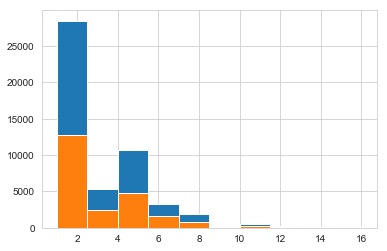

In [18]:
print(df.groupby('accommodates')['id'].count())
plt.hist(df['accommodates'], bins=10)

print(df_test.groupby('accommodates')['id'].count())
plt.hist(df_test['accommodates'], bins=10)

Removing Outliers

Not really outliers but the number is too small


In [19]:
# print(df['accommodates'].describe())

# mean_a = np.mean(df['accommodates'])
# std_a = np.std(df['accommodates'])

# df = df[(df['accommodates']>mean_a-3*std_a)&(df['accommodates']<mean_a+3*std_a)]

# print('After removing outliers:')
# print(df['accommodates'].describe())

# plt.figure()
# plt.hist(df['accommodates'])
# plt.show

Grouping into few columns
Didn't show improvement

In [20]:
# list_accom = ['1', '2', '3', '4', '5', '6', '7-8-9', '10-11-12', '13-14-15-16'] #Groups: 1, 2, 3, 4, 5, 6, 7-8-9 , 10-11-12, 13-14-15-16

# def create_column(col, element):
#     column = []
#     for i in col:
#         if (str(i) in element):
#             if element == '7-8-9':
#                 column.append(1)
#             elif len(element) != 1:
#                 if len(str(i)) > 1:
#                     column.append(1)
#                 else:
#                     column.append(0)
#             else: 
#                 column.append(1)
#         else:
#             column.append(0)
#     return column

# for item in [df, df_test]:
#     for i in range(len(list_accom)):
#         item[list_accom[i]] = create_column(item['accommodates'],list_accom[i]) #1 if item['amenities'].str.contains(names[i]) else 0
#     del item['accommodates']

# df.head(5)

### Bathrooms

In [21]:
print(df.groupby('bathrooms')['id'].count())
print(df_test.groupby('bathrooms')['id'].count())

for item in [df, df_test]:
    item.loc[(item['bathrooms'] == 0) | (item['bathrooms'] == 0.5), 'bathrooms'] = 1
    item['bathrooms'] = item['bathrooms'].fillna(1.0)


bathrooms
0.0      140
0.5      151
1.0    40078
1.5     2621
2.0     5377
2.5     1056
3.0      745
3.5      288
4.0      192
4.5       80
5.0       46
5.5       30
6.0       20
6.5        6
7.0        9
7.5        3
8.0       25
Name: id, dtype: int64
bathrooms
0.0       58
0.5       58
1.0    18021
1.5     1180
2.0     2559
2.5      511
3.0      321
3.5      141
4.0       94
4.5       36
5.0       26
5.5        9
6.0        4
6.5        6
7.0        1
7.5        3
8.0       16
Name: id, dtype: int64


Removing bathroom outliers

(It has inmproved the results)

In [22]:
# print(df['bathrooms'].describe())
# plt.hist(df['bathrooms'])

# mean_a = np.mean(df['bathrooms'])
# std_a = np.std(df['bathrooms'])

# df = df[(df['bathrooms']>mean_a-3*std_a)&(df['bathrooms']<mean_a+3*std_a)]

# print('After removing outliers:')
# print(df['bathrooms'].describe())

# plt.figure()
# plt.hist(df['bathrooms'])
# plt.show

### Cleaning Fee

In [23]:
print(df.groupby('cleaning_fee')['id'].count())

for item in [df, df_test]:
    item['cleaning_fee'] =  [1 if i == True else 0 for i in item['cleaning_fee']]
    

df.head(5)

cleaning_fee
False    13549
True     37451
Name: id, dtype: int64


,id,zipcode,accommodates,bedrooms,cleaning_fee,city,latitude,longitude,number_of_reviews,property_type,...,24-hour check-in,Baby monitor,Bed linens,Children’s books and toys,Paid parking off premises,Patio or balcony,Lake access,Dishwasher,Elevator,Coffee maker
0,13662370,60608,2,1.0,1,Chicago,41.849684,-87.676270,17,House,...,0,0,0,0,0,0,0,0,0,0
1,4765892,90012,2,1.0,1,LA,34.068613,-118.246455,2,Apartment,...,0,0,0,0,0,0,0,0,0,0
2,21169968,11237,5,2.0,1,NYC,40.701958,-73.917352,25,Apartment,...,0,0,1,0,0,0,0,0,0,0
3,7939196,10010,6,1.0,1,NYC,40.742959,-73.990820,12,Apartment,...,0,0,0,0,0,0,0,0,1,0
4,18161036,91766,2,1.0,1,LA,34.046473,-117.734095,2,House,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_test.head(25)

,id,zipcode,accommodates,bedrooms,cleaning_fee,city,latitude,longitude,number_of_reviews,property_type,...,24-hour check-in,Baby monitor,Bed linens,Children’s books and toys,Paid parking off premises,Patio or balcony,Lake access,Dishwasher,Elevator,Coffee maker
0,986942,10031,2,1.0,0,NYC,40.830190,-73.949911,1,Apartment,...,0,0,0,0,0,0,0,0,1,0
1,16436737,20009,4,1.0,1,DC,38.923224,-77.028447,146,House,...,1,0,0,0,0,0,0,0,0,0
2,18209634,11225.0,1,1.0,1,NYC,40.668250,-73.953039,10,Apartment,...,0,0,1,0,0,0,0,0,0,0
3,15027024,11225.0,2,1.0,0,NYC,40.668870,-73.952920,0,Apartment,...,0,0,0,0,0,0,0,0,1,0
4,18074243,11377,6,2.0,1,NYC,40.741597,-73.906845,45,Apartment,...,1,0,0,0,0,0,0,0,0,0
5,8446914,94133,2,1.0,1,SF,37.804448,-122.409273,16,Apartment,...,0,0,0,0,0,0,0,0,0,0
6,19362916,91016,2,2.0,0,LA,34.149831,-118.019777,0,Condominium,...,0,0,0,0,0,0,0,0,0,0
7,16116059,10036,6,2.0,1,NYC,40.756069,-73.985934,119,Apartment,...,1,0,1,0,0,1,0,1,1,1
8,20912583,90046,2,1.0,0,LA,34.102126,-118.361790,0,Bed & Breakfast,...,0,0,0,0,0,0,0,0,0,0
9,13573101,90057,4,1.0,0,LA,34.062219,-118.282087,1,Apartment,...,0,0,0,0,0,0,0,0,1,0


### City

city
Boston      2391
Chicago     2585
DC          3893
LA         15387
NYC        22256
SF          4488
Name: id, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

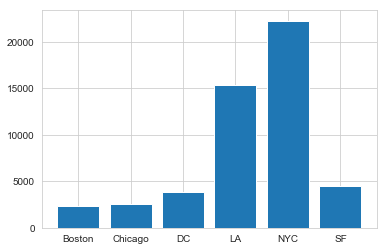

In [25]:
print(df.groupby('city')['id'].count())
plt.figure()
plt.bar(df.groupby('city')['id'].count().index, df.groupby('city')['id'].count().values)
plt.show

In [26]:
for item in [df, df_test]:
    item_city = pd.get_dummies(item['city'])
    for i, col in enumerate(item_city.columns):
        item[col] = item_city[col]
    #item = pd.concat([item, item_city], axis=1)
    del item['city']

In [27]:
df.head(5)

,id,zipcode,accommodates,bedrooms,cleaning_fee,latitude,longitude,number_of_reviews,property_type,bathrooms,...,Lake access,Dishwasher,Elevator,Coffee maker,Boston,Chicago,DC,LA,NYC,SF
0,13662370,60608,2,1.0,1,41.849684,-87.676270,17,House,1.5,...,0,0,0,0,0,1,0,0,0,0
1,4765892,90012,2,1.0,1,34.068613,-118.246455,2,Apartment,2.0,...,0,0,0,0,0,0,0,1,0,0
2,21169968,11237,5,2.0,1,40.701958,-73.917352,25,Apartment,1.0,...,0,0,0,0,0,0,0,0,1,0
3,7939196,10010,6,1.0,1,40.742959,-73.990820,12,Apartment,1.0,...,0,0,1,0,0,0,0,0,1,0
4,18161036,91766,2,1.0,1,34.046473,-117.734095,2,House,1.0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df_test.head(5)

,id,zipcode,accommodates,bedrooms,cleaning_fee,latitude,longitude,number_of_reviews,property_type,bathrooms,...,Lake access,Dishwasher,Elevator,Coffee maker,Boston,Chicago,DC,LA,NYC,SF
0,986942,10031,2,1.0,0,40.830190,-73.949911,1,Apartment,1.0,...,0,0,1,0,0,0,0,0,1,0
1,16436737,20009,4,1.0,1,38.923224,-77.028447,146,House,1.5,...,0,0,0,0,0,0,1,0,0,0
2,18209634,11225.0,1,1.0,1,40.668250,-73.953039,10,Apartment,1.0,...,0,0,0,0,0,0,0,0,1,0
3,15027024,11225.0,2,1.0,0,40.668870,-73.952920,0,Apartment,1.0,...,0,0,1,0,0,0,0,0,1,0
4,18074243,11377,6,2.0,1,40.741597,-73.906845,45,Apartment,1.0,...,0,0,0,0,0,0,0,0,1,0


### Bedrooms

bedrooms
0.0      4629
1.0     34387
2.0      7717
3.0      2967
4.0       922
5.0       250
6.0        72
7.0        30
8.0        12
9.0         7
10.0        7
Name: id, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

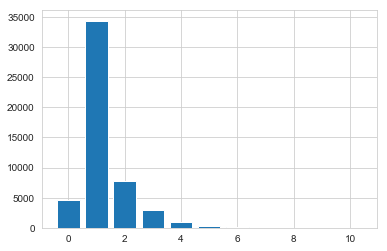

In [29]:
for item in [df, df_test]:
    item['bedrooms'] = item['bedrooms'].fillna(1)

print(df.groupby('bedrooms')['id'].count())
plt.figure()
plt.bar(df.groupby('bedrooms')['id'].count().index, df.groupby('bedrooms')['id'].count().values)
plt.show

In [30]:
num_house_no_bedrooms = df[(df['bedrooms'] == 0) & (df['Entire home/apt'] == 1)]['id'].count()
num_priv_no_bedrooms = df[(df['bedrooms'] == 0) & (df['Private room'] == 1)]['id'].count()
num_shared_no_bedrooms = df[(df['bedrooms'] == 0) & (df['Shared room'] == 1)]['id'].count()
print('In df Shared rooms with 0 bedrooms:', num_shared_no_bedrooms)
print('In df Private Room with 0 bedrooms:', num_priv_no_bedrooms)
print('In df Entire House with 0 bedrooms:', num_house_no_bedrooms, '\n')

num_house_no_bedrooms = df_test[(df_test['bedrooms'] == 0) & (df_test['Entire home/apt'] == 1)]['id'].count()
num_priv_no_bedrooms = df_test[(df_test['bedrooms'] == 0) & (df_test['Private room'] == 1)]['id'].count()
num_shared_no_bedrooms = df_test[(df_test['bedrooms'] == 0) & (df_test['Shared room'] == 1)]['id'].count()
print('In df_test Shared rooms with 0 bedrooms:', num_shared_no_bedrooms)
print('In df_test Private Room with 0 bedrooms:', num_priv_no_bedrooms)
print('In df_test Entire House with 0 bedrooms:', num_house_no_bedrooms)



In df Shared rooms with 0 bedrooms: 0
In df Private Room with 0 bedrooms: 280
In df Entire House with 0 bedrooms: 4349 

In df_test Shared rooms with 0 bedrooms: 0
In df_test Private Room with 0 bedrooms: 151
In df_test Entire House with 0 bedrooms: 1935


In [31]:
print(len(df[(df['Shared room'] == 1)]['bedrooms'].unique()))

1


We will consider that **bedrooms = 0** and  **Entire House = 1** ---> Studio

Lets now replace **bedrooms = 0** were **Private room = 1** by **bedrooms = 1**

In df Private Room with 0 bedrooms: 0
In df_test Private Room with 0 bedrooms: 0
bedrooms
0.0      4349
1.0     34667
2.0      7717
3.0      2967
4.0       922
5.0       250
6.0        72
7.0        30
8.0        12
9.0         7
10.0        7
Name: id, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

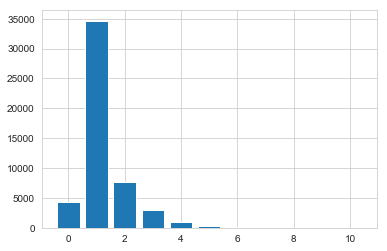

In [32]:
df.loc[(df['bedrooms'] == 0) & (df['Private room'] == 1), ['bedrooms']] = 1
df_test.loc[(df_test['bedrooms'] == 0) & (df_test['Private room'] == 1), ['bedrooms']] = 1
num_priv_no_bedrooms = df[(df['bedrooms'] == 0) & (df['Private room'] == 1)]['id'].count()
num_priv_no_bedrooms = df_test[(df_test['bedrooms'] == 0) & (df_test['Private room'] == 1)]['id'].count()
print('In df Private Room with 0 bedrooms:', num_priv_no_bedrooms)
print('In df_test Private Room with 0 bedrooms:', num_priv_no_bedrooms)

print(df.groupby('bedrooms')['id'].count())
plt.figure()
plt.bar(df.groupby('bedrooms')['id'].count().index, df.groupby('bedrooms')['id'].count().values)
plt.show

Removing outliers (or just very high amount of rooms as there are nom much of them)

**Not sure it is a good idea**

It has improved the results so I kept it

In [33]:
# print(df['bedrooms'].describe())

# mean_b = np.mean(df['bedrooms'])
# std_b = np.std(df['bedrooms'])

# df = df[(df['bedrooms']>mean_b-3*std_b)&(df['bedrooms']<mean_b+3*std_b)]

# print('After removing outliers:')
# print(df['bedrooms'].describe())

# plt.figure()
# plt.hist(df['bedrooms'])
# plt.show

### Log Price

count    51000.000000
mean         4.778693
std          0.714838
min          0.000000
25%          4.304065
50%          4.700480
75%          5.216291
max          7.600402
Name: log_price, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

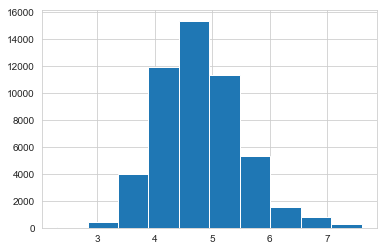

In [34]:
print(df['log_price'].describe())

df = df[(df['log_price']>0)]

plt.figure()
plt.hist(df['log_price'])
plt.show

Removing outliers

In [35]:
# mean_p = np.mean(df['log_price'])
# std_p = np.std(df['log_price'])

# df = df[(df['log_price']>mean_p-3*std_p)]

# #&(df['log_price']<mean_p+3*std_p)
# print(df['log_price'].describe())

# plt.figure()
# plt.hist(df['log_price'])
# plt.show

Prices by room type

In [36]:
# temp = df.loc[df['Shared room'] == 1,'log_price'].copy()
# plt.hist(temp, bins=10, label='Shared room', alpha=0.5)

# # temp = df.loc[df['Entire home/apt'] == 1,'log_price'].copy()
# # plt.hist(temp, bins=10, label='Entire home/apt', alpha=0.5)

# # temp = df.loc[df['Private room'] == 1,'log_price'].copy()
# # plt.hist(temp, bins=10, label='Private room', alpha=0.5)
# plt.title('Prices by room type')
# plt.legend()

Removing outliers

In [37]:
# temp = pd.DataFrame(df.loc[df['Shared room'] == 1,['log_price','id']]).copy()
# mean_p = np.mean(temp['log_price'])
# std_p = np.std(temp['log_price'])
# print(temp['log_price'].describe())
# temp = temp[(temp['log_price']>mean_p-3*std_p)&(temp['log_price']<mean_p+3*std_p)]
# #temp = temp[(temp['log_price']>mean_p-3*std_p)&(temp['log_price']<mean_p+3*std_p)]
# #temp['log_price']
# print(temp.head(5))
# print(temp['log_price'].describe())
# #temp = df.loc[df['Shared room'] == 1,'log_price'].copy()
# plt.hist(temp['log_price'], bins=10, label='Shared room', alpha=0.5)


### Add Distance to attractions

In [38]:
# for item in [df, df_test]:
#     item.reset_index(inplace=True, drop = True)
#     dist = []
#     for i in range(len(item.index)):
#         if item.loc[i, 'NYC'] == 1:
#             dist_NY = []
#             dist_lat = (40.706371 - item.loc[i, 'latitude'])**2
#             dist_long = (-74.009506 - item.loc[i, 'longitude'])**2
#             dist_NY.append(np.sqrt(dist_lat + dist_long)) # Wall Street
#             dist_lat = (40.723016 - item.loc[i, 'latitude'])**2
#             dist_long = (-73.998777 - item.loc[i, 'longitude'])**2
#             dist_NY.append(np.sqrt(dist_lat + dist_long)) # SoHo
#             dist_lat = (40.757890 - item.loc[i, 'latitude'])**2
#             dist_long = (-73.985613 - item.loc[i, 'longitude'])**2
#             dist_NY.append(np.sqrt(dist_lat + dist_long)) # Times Square
#             dist_lat = (40.781994 - item.loc[i, 'latitude'])**2
#             dist_long = (-73.975527 - item.loc[i, 'longitude'])**2
#             dist_NY.append(np.sqrt(dist_lat + dist_long)) # Upper West Side
#             dist_lat = (40.765303 - item.loc[i, 'latitude'])**2
#             dist_long = (-73.972159 - item.loc[i, 'longitude'])**2
#             dist_NY.append(np.sqrt(dist_lat + dist_long)) # 5th Avenue

#             dist.append(np.min(dist_NY))
#         elif item.loc[i, 'Boston'] == 1:
#             dist_BT = []
#             dist_lat = (42.349557 - item.loc[i, 'latitude'])**2
#             dist_long = (-71.079517 - item.loc[i, 'longitude'])**2
#             dist_BT.append(np.sqrt(dist_lat + dist_long)) # Back Bay
#             dist_lat = (42.352481 - item.loc[i, 'latitude'])**2
#             dist_long = (-71.067506 - item.loc[i, 'longitude'])**2
#             dist_BT.append(np.sqrt(dist_lat + dist_long)) # Common Gardens
#             dist_lat = (42.365103 - item.loc[i, 'latitude'])**2
#             dist_long = (-71.055466 - item.loc[i, 'longitude'])**2
#             dist_BT.append(np.sqrt(dist_lat + dist_long)) # North End
#             dist_lat = (42.357931 - item.loc[i, 'latitude'])**2
#             dist_long = (-71.053029 - item.loc[i, 'longitude'])**2
#             dist_BT.append(np.sqrt(dist_lat + dist_long)) # Financial District
#             dist_lat = (42.373371 - item.loc[i, 'latitude'])**2
#             dist_long = (-71.119394 - item.loc[i, 'longitude'])**2
#             dist_BT.append(np.sqrt(dist_lat + dist_long)) # Harward
#             dist_lat = (42.362526 - item.loc[i, 'latitude'])**2
#             dist_long = (-71.088194 - item.loc[i, 'longitude'])**2
#             dist_BT.append(np.sqrt(dist_lat + dist_long)) # MIT
            
#             dist.append(np.min(dist_BT))            
#         elif item.loc[i, 'DC'] == 1:
#             dist_DC = []
#             dist_lat = (38.905181 - item.loc[i, 'latitude'])**2
#             dist_long = (-77.065253 - item.loc[i, 'longitude'])**2
#             dist_DC.append(np.sqrt(dist_lat + dist_long))  # Georgetown
#             dist_lat = (38.909619 - item.loc[i, 'latitude'])**2
#             dist_long = (-77.043471 - item.loc[i, 'longitude'])**2
#             dist_DC.append(np.sqrt(dist_lat + dist_long))  # Dupont Circle
#             dist_lat = (38.921663 - item.loc[i, 'latitude'])**2
#             dist_long = (-77.042369 - item.loc[i, 'longitude'])**2
#             dist_DC.append(np.sqrt(dist_lat + dist_long))  # Adams Morgan
#             dist_lat = (38.909630 - item.loc[i, 'latitude'])**2
#             dist_long = (-77.029655 - item.loc[i, 'longitude'])**2
#             dist_DC.append(np.sqrt(dist_lat + dist_long))  # Logan Circle
#             dist_lat = (38.897341 - item.loc[i, 'latitude'])**2
#             dist_long = (-77.046679 - item.loc[i, 'longitude'])**2
#             dist_DC.append(np.sqrt(dist_lat + dist_long))  # Foggy Bottom
#             dist_lat = (38.925451 - item.loc[i, 'latitude'])**2
#             dist_long = (-77.052645 - item.loc[i, 'longitude'])**2
#             dist_DC.append(np.sqrt(dist_lat + dist_long))  # Woodley Park
#             dist_lat = (38.886092 - item.loc[i, 'latitude'])**2
#             dist_long = (-77.003582 - item.loc[i, 'longitude'])**2
#             dist_DC.append(np.sqrt(dist_lat + dist_long))  # Capitol Hill
            
#             dist.append(np.min(dist_DC))
#         elif item.loc[i, 'Chicago'] == 1:
#             dist_CH = []
#             dist_lat = (41.965530 - item.loc[i, 'latitude'])**2
#             dist_long = (-87.650058 - item.loc[i, 'longitude'])**2
#             dist_CH.append(np.sqrt(dist_lat + dist_long))  # Montrose Beach
#             dist_lat = (41.925661 - item.loc[i, 'latitude'])**2
#             dist_long = (-87.640433 - item.loc[i, 'longitude'])**2
#             dist_CH.append(np.sqrt(dist_lat + dist_long))  #Lincoln Park & the North Side
#             dist_lat = (41.793260 - item.loc[i, 'latitude'])**2
#             dist_long = (-87.596206 - item.loc[i, 'longitude'])**2
#             dist_CH.append(np.sqrt(dist_lat + dist_long))  # Univercity of Chicago
            
#             dist.append(np.min(dist_CH))
#         elif item.loc[i, 'LA'] == 1:
#             dist_LA = []
#             dist_lat = (34.056510 - item.loc[i, 'latitude'])**2
#             dist_long = (-118.413742 - item.loc[i, 'longitude'])**2
#             dist_LA.append(np.sqrt(dist_lat + dist_long)) # Century City
#             dist_lat = (34.016371 - item.loc[i, 'latitude'])**2
#             dist_long = (-118.495188 - item.loc[i, 'longitude'])**2
#             dist_LA.append(np.sqrt(dist_lat + dist_long)) #Santa-Monica
#             dist_lat = (34.021315 - item.loc[i, 'latitude'])**2
#             dist_long = (-118.802395 - item.loc[i, 'longitude'])**2
#             dist_LA.append(np.sqrt(dist_lat + dist_long)) #Malibu
#             dist_lat = (34.090427 - item.loc[i, 'latitude'])**2
#             dist_long = (-118.376306 - item.loc[i, 'longitude'])**2
#             dist_LA.append(np.sqrt(dist_lat + dist_long)) #West Hollywood
#             dist_lat = (34.101569 - item.loc[i, 'latitude'])**2
#             dist_long = (-118.353901 - item.loc[i, 'longitude'])**2
#             dist_LA.append(np.sqrt(dist_lat + dist_long)) #Hollywood
#             dist_lat = (33.987300 - item.loc[i, 'latitude'])**2
#             dist_long = (-118.465320 - item.loc[i, 'longitude'])**2
#             dist_LA.append(np.sqrt(dist_lat + dist_long)) #Venice
#             dist_lat = (34.069211 - item.loc[i, 'latitude'])**2
#             dist_long = (-118.403100 - item.loc[i, 'longitude'])**2
#             dist_LA.append(np.sqrt(dist_lat + dist_long)) #Beverly Hills
            
#             dist.append(np.min(dist_LA))
#         elif item.loc[i, 'SF'] == 1:
#             dist_SF = []
#             dist_lat = (37.790535 - item.loc[i, 'latitude'])**2
#             dist_long = (-122.413831 - item.loc[i, 'longitude'])**2
#             dist_SF.append(np.sqrt(dist_lat + dist_long)) # Nob Hill and Union Square
#             dist_lat = (37.758545 - item.loc[i, 'latitude'])**2
#             dist_long = (-122.419164 - item.loc[i, 'longitude'])**2
#             dist_SF.append(np.sqrt(dist_lat + dist_long)) # The Misson 
#             dist_lat = (37.769773 - item.loc[i, 'latitude'])**2
#             dist_long = (-122.448638 - item.loc[i, 'longitude'])**2
#             dist_SF.append(np.sqrt(dist_lat + dist_long)) # Haight-Ashbury
#             dist_lat = (37.807093 - item.loc[i, 'latitude'])**2
#             dist_long = (-122.417275 - item.loc[i, 'longitude'])**2
#             dist_SF.append(np.sqrt(dist_lat + dist_long)) # Fisherman's Wharf         

#             dist.append(np.min(dist_SF))
#         else: 
#             print('Error')
#             break
#     item['distance_attractions'] = dist


### Add Distance to the city center

In [39]:
for item in [df, df_test]:
    item.reset_index(inplace=True, drop = True)
    dist = []
    for i in range(len(item.index)):
        if item.loc[i, 'NYC'] == 1:
            dist_lat = (40.774769 - item.loc[i, 'latitude'])**2
            dist_long = (-73.969348 - item.loc[i, 'longitude'])**2
            dist1 = np.sqrt(dist_lat + dist_long) #center
            dist.append(dist1)
        elif item.loc[i, 'Boston'] == 1:
            dist_lat = (42.358281 - item.loc[i, 'latitude'])**2
            dist_long = (-71.061404 - item.loc[i, 'longitude'])**2
            dist.append(np.sqrt(dist_lat + dist_long))
        elif item.loc[i, 'DC'] == 1:
            dist_lat = (38.890383 - item.loc[i, 'latitude'])**2
            dist_long = (-77.031858 - item.loc[i, 'longitude'])**2
            dist.append(np.sqrt(dist_lat + dist_long))
        elif item.loc[i, 'Chicago'] == 1:
            dist_lat = (41.883347 - item.loc[i, 'latitude'])**2
            dist_long = (-87.630922 - item.loc[i, 'longitude'])**2
            dist.append(np.sqrt(dist_lat + dist_long))
        elif item.loc[i, 'LA'] == 1:
            dist_lat = (34.042290 - item.loc[i, 'latitude'])**2
            dist_long = (-118.245161 - item.loc[i, 'longitude'])**2
            dist1 = np.sqrt(dist_lat + dist_long) # center
            dist_lat = (34.101569 - item.loc[i, 'latitude'])**2
            dist_long = (-118.353901 - item.loc[i, 'longitude'])**2
            dist2 = np.sqrt(dist_lat + dist_long) #Hollywood
            if dist1 > dist2:
                dist.append(dist2)
            else:
                dist.append(dist1)
        elif item.loc[i, 'SF'] == 1:
            dist_lat = (37.802261 - item.loc[i, 'latitude'])**2
            dist_long = (-122.417433 - item.loc[i, 'longitude'])**2
            dist.append(np.sqrt(dist_lat + dist_long))
        else: 
            print('Error')
            break
    item['distance'] = dist

    

### Discover distances

count    50999.000000
mean         0.080405
std          0.071388
min          0.000094
25%          0.035149
50%          0.059621
75%          0.099813
max          0.764725
Name: distance, dtype: float64

Number of houses with distance higher then 0,4:  361


<function matplotlib.pyplot.show(*args, **kw)>

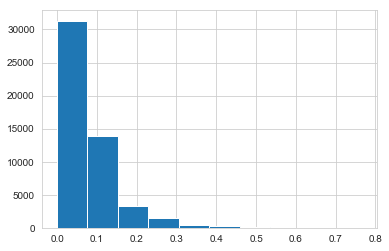

In [40]:
print(df['distance'].describe())
print('\nNumber of houses with distance higher then 0,4: ', df[df['distance'] > 0.4]['id'].count())

plt.figure()
plt.hist(df['distance'])
plt.show

### Adding Zipcode

Cleanning up zipcode values

In [41]:
df.loc[df[df['zipcode'] == '95202\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n94158'].index, 'zipcode'] = 95202
df.loc[df[df['zipcode'] == ' '].index, 'zipcode'] = None
df.loc[df[df['zipcode'] == '1m'].index, 'zipcode'] = None

df_test.loc[df_test[df_test['zipcode'] == '11249\r\r\r\r\r\r\r\n11249'].index, 'zipcode'] = 11249
df_test.loc[df_test[df_test['zipcode'] == 'Near 91304'].index, 'zipcode'] = 91304
df_test.loc[df_test[df_test['zipcode'] == ' '].index, 'zipcode'] = None
df_test.loc[df_test[df_test['zipcode'] == 1].index, 'zipcode'] = None


df['zipcode'] = df['zipcode'].astype(str)
df_test['zipcode'] = df_test['zipcode'].astype(str)

# Cleanning up
for item in [df, df_test]:
    zip_new = []
    for code in item['zipcode']:
        for i in range(len(code)):
            code = code.strip()
            if (code[i] == '.') | (code[i] == '-'):
                point = i
                code = code[:point]
                break
        zip_new.append(code)
    item['zipcode'] = zip_new
    item.loc[item['zipcode'] == 'None', ['zipcode']] = None

list_zip_df = list(df['zipcode'].unique())
list_zip_df_test = list(df_test['zipcode'].unique())
list_zip_unique = list(set(list_zip_df + list_zip_df_test))


list_zip_unique.remove(None)
list_zip_unique.remove('nan')
list_zip_unique = [incom for incom in list_zip_unique if str(incom) != 'nan']



Creating dummies

In [42]:
#print(list_zip_unique)
list_creator = lambda col, element: [1 if element == i else 0 for i in col]
for item in [df, df_test]:
    for i in range(len(list_zip_unique)):
        item[list_zip_unique[i]] = list_creator(item['zipcode'],list_zip_unique[i]) #1 if item['amenities'].str.contains(names[i]) else 0
    del item['zipcode']

df_test.head(5)


,id,accommodates,bedrooms,cleaning_fee,latitude,longitude,number_of_reviews,property_type,bathrooms,Lincoln Park,...,91436,91733,94134,91205,10457,94133,11209,60643,11236,02128
0,986942,2,1.0,0,40.830190,-73.949911,1,Apartment,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,16436737,4,1.0,1,38.923224,-77.028447,146,House,1.5,0,...,0,0,0,0,0,0,0,0,0,0
2,18209634,1,1.0,1,40.668250,-73.953039,10,Apartment,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,15027024,2,1.0,0,40.668870,-73.952920,0,Apartment,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,18074243,6,2.0,1,40.741597,-73.906845,45,Apartment,1.0,0,...,0,0,0,0,0,0,0,0,0,0


### number_of_reviews      

count    50999.000000
mean        21.010510
std         38.074128
min          0.000000
25%          1.000000
50%          6.000000
75%         24.000000
max        605.000000
Name: number_of_reviews, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

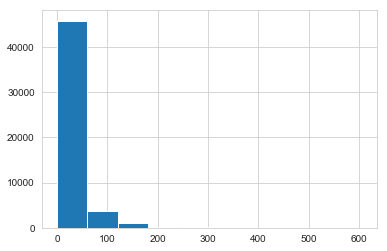

In [43]:
print(df['number_of_reviews'].describe())

plt.figure()
plt.hist(df['number_of_reviews'])
plt.show

Removing outiers - not a good idea

In [44]:
# mean_p = np.mean(df['number_of_reviews'])
# std_p = np.std(df['number_of_reviews'])

# df = df[(df['number_of_reviews']>mean_p-3*std_p)&(df['number_of_reviews']<mean_p+3*std_p)]

# print(df['number_of_reviews'].describe())

# plt.figure()
# plt.hist(df['number_of_reviews'])
# plt.show

### Property type

In [45]:
df_prop = pd.DataFrame(df.groupby('property_type')['id'].count())
df_test_prop = pd.DataFrame(df_test.groupby('property_type')['id'].count())

list_prop_df = list(df_prop[df_prop['id'] > 10].index)
list_prop_df_test = list(df_test_prop[df_test_prop['id'] > 10].index)
list_prop_unique = list(set(list_prop_df + list_prop_df_test))

print(len(list_prop_df))
print(len(list_prop_df_test))
print(list_prop_unique, len(list_prop_unique))

# Separating them into separate columns

list_creator = lambda col, element: [1 if element == i else 0 for i in col]
for item in [df, df_test]:
    for i in range(len(list_prop_unique)):
        item[list_prop_unique[i]] = list_creator(item['property_type'],list_prop_unique[i]) #1 if item['amenities'].str.contains(names[i]) else 0
    del item['property_type']


20
19
['Apartment', 'Camper/RV', 'Bungalow', 'Boutique hotel', 'Cabin', 'Guesthouse', 'House', 'Boat', 'Loft', 'Condominium', 'Timeshare', 'Villa', 'Hostel', 'Townhouse', 'Guest suite', 'Serviced apartment', 'Bed & Breakfast', 'Other', 'In-law', 'Dorm'] 20


### Adding metro distances

In [46]:

df_ny = pd.read_csv('data/ny_metro.csv')
df_boston = pd.read_csv('data/boston_metro.csv')
df_sf = pd.read_csv('data/sf_metro.csv')
df_dc = pd.read_csv('data/dc_metro.csv')
df_chicago = pd.read_csv('data/chicago_metro.csv')
df_la = pd.read_csv('data/LA_metro.csv')

df.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

for item in [df, df_test]:
    dist_metro = []
    for i, row in enumerate(item.index):
        if item.loc[i,'NYC'] == 1:
            list_dist = []
            for j, point in enumerate(df_ny):
                dist_lat = (item.loc[i,'latitude'] - df_ny.loc[j,'lat'])**2
                dist_long = (item.loc[i,'longitude'] - df_ny.loc[j,'long'])**2
                dist = np.sqrt(dist_lat + dist_long)
                list_dist.append(dist)
            dist_metro.append(np.min(list_dist))
        elif item.loc[i,'Boston'] == 1:
            list_dist = []
            for j, point in enumerate(df_boston):
                dist_lat = (item.loc[i,'latitude'] - df_boston.loc[j,'lat'])**2
                dist_long = (item.loc[i,'longitude'] - df_boston.loc[j,'long'])**2
                dist = np.sqrt(dist_lat + dist_long)
                list_dist.append(dist)
            dist_metro.append(np.min(list_dist))
        elif item.loc[i,'SF'] == 1:
            list_dist = []
            for j, point in enumerate(df_sf):
                dist_lat = (item.loc[i,'latitude'] - df_sf.loc[j,'lat'])**2
                dist_long = (item.loc[i,'longitude'] - df_sf.loc[j,'long'])**2
                dist = np.sqrt(dist_lat + dist_long)
                list_dist.append(dist)
            dist_metro.append(np.min(list_dist))
        elif item.loc[i,'DC'] == 1:
            list_dist = []
            for j, point in enumerate(df_dc):
                dist_lat = (item.loc[i,'latitude'] - df_dc.loc[j,'lat'])**2
                dist_long = (item.loc[i,'longitude'] - df_dc.loc[j,'long'])**2
                dist = np.sqrt(dist_lat + dist_long) 
                list_dist.append(dist)
            dist_metro.append(np.min(list_dist))
        elif item.loc[i,'Chicago'] == 1:
            list_dist = []
            for j, point in enumerate(df_chicago):
                dist_lat = (item.loc[i,'latitude'] - df_chicago.loc[j,'lat'])**2
                dist_long = (item.loc[i,'longitude'] - df_chicago.loc[j,'long'])**2
                dist = np.sqrt(dist_lat + dist_long) 
                list_dist.append(dist)
            dist_metro.append(np.min(list_dist))
        elif item.loc[i,'LA'] == 1:
            list_dist = []
            for j, point in enumerate(df_la):
                dist_lat = (item.loc[i,'latitude'] - df_la.loc[j,'lat'])**2
                dist_long = (item.loc[i,'longitude'] - df_la.loc[j,'long'])**2
                dist = np.sqrt(dist_lat + dist_long) 
                list_dist.append(dist)
            dist_metro.append(np.min(list_dist))
        else:
            dist_metro.append(0)

    print(len(dist_metro))
    print(len(item))
    item['dist_metro'] = dist_metro
    

    del item['latitude']
    del item['longitude']

df_test.head(5)

50999
50999
23111
23111


,id,accommodates,bedrooms,cleaning_fee,number_of_reviews,bathrooms,Lincoln Park,South Beach,Pacific Palisades,Hollywood Hills,...,Villa,Hostel,Townhouse,Guest suite,Serviced apartment,Bed & Breakfast,Other,In-law,Dorm,dist_metro
0,986942,2,1.0,0,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.108264
1,16436737,4,1.0,1,146,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.006183
2,18209634,1,1.0,1,10,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.069131
3,15027024,2,1.0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.068761
4,18074243,6,2.0,1,45,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.085012


In [47]:
df_test.head(5)

,id,accommodates,bedrooms,cleaning_fee,number_of_reviews,bathrooms,Lincoln Park,South Beach,Pacific Palisades,Hollywood Hills,...,Villa,Hostel,Townhouse,Guest suite,Serviced apartment,Bed & Breakfast,Other,In-law,Dorm,dist_metro
0,986942,2,1.0,0,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.108264
1,16436737,4,1.0,1,146,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.006183
2,18209634,1,1.0,1,10,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.069131
3,15027024,2,1.0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.068761
4,18074243,6,2.0,1,45,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.085012


# Delete usless columns

In [48]:
useless = ['nan','Bungalow', '90067', '91423', '10040', '94131', '90402', '90042', '94114', '90807', '90038', '91101', '11208', '20036', '20016', '90043', '02111', 'Timeshare', '90018', '11103', '02113', '90041', '90293', '02125', 'Dorm', '94127', '94133', '11220', '10075', '10033', '91602', '10037', '02210', '90250', '60623', '11210', '11209', '91104', '91776', '94122', '10039', '91335', '90717', '20018', '10069', '91403', '11235', '60615', '11212', '02134', '60642', '60605', 'Hostel', '90278', '11435', '10034', '02129', 'Guest suite', 'Villa', '90033', '11378', '10044', '90005', '91103', '91605', '91401', '91356', '90057', '11232', '11355', '94134', '90232', '02120', '60653', '91801', '10451', '90301', '91107', '60641', '90302', '91770', '60625', '91607', '90505', '94121', '11372', '11412', '60611', '11230', '60601', '11415', '91505', '11691', '10106', '90802', '11214', '11692', '91754', '11375', '90712', '91405', '11373', '02119', '90008', '90014', '60654', '60660', '11354', '91406', '60626', '11413', '90047', '91324', '90020', '91364', 'Cabin', '02121', '94124', '90230', '91402', '90804', '11234', '91436', '90037', '11693', '90248', '91006', '94116', '11434', '91367', '91803', '20015', '11694', '90063', '91106', '90220', '02108', '10270', '10466', '90013', '91502', '90094', '90805', '60645', '90713', 'In-law', '91775', '10463', '11204', '60617', '10301', '90806', '11368', '02132', '91206', '91030', '90044', '20006', '60649', '10469', '90640', '91316', '02126', '10454', '90813', '94158', '02131', '60624', '94104', '91007', '90021', '10457', '10314', '91042', '94132', '91325', '90710', '10475', '90808', '90303', '90815', '90501', '90061', '91411', '91331', '10467', '90504', '11374', '60637', '91755', '10704', '10304', '90650', '11433', '11421', '90275', '11358', '91344', '11229', '91016', '91202', '91732', '11369', '91506', '11429', '20004', '11432', '02122', '60634', '02110', '11109', '90260', '10453', '10281', '11219', '90056', '20032', '90280', '11228', '91501', '02136', '60621', '90503', '90010', '10462', '20816', '91303', '90058', '91011', '90249', '91746', '91201', '10305', '91020', '20782', '90305', '02124', '91040', '11356', '10471', '91745', '60629', '90745', '10000', '11422', '11223', '94111', '91024', '91504', '60632', '90814', '60609', '10452', '90660', '20268', '10459', '60630', '90602', '10456', '90601', '91205', '60651', '11224', '90245', '60639', '10455', '60661', '10472', '11414', '90262', '11416', '60619', '11417', '91306', '60659', '11436', '90701', '10468', '60646', '10464', '90011', '90603', '11370', '90703', '91204', '11411', '11379', '210', '10473', '91352', '90241', '90746', '90003', '11361', '90059', '10306', '90502', '20743', '91207', '91010', '60643', '20912', '10461', '91203', '11367', '90022', '10474', 'Serviced apartment', '94014', '91731', '60620', '11423', '91326', '90604', '11360', '90002', '11365', '91214', '91733', '90744', '11418', '10129', '11419', '90023', '90755', '10308', '11420', '10303', '10470', '90810', '91343', '02467', '91706', '60636', '10310', '90670', '10458', '94130', '91208', 'Unnamed: 325', '20910', '11366', '91340', '90274', '11362', '11364', '91108', '90001', '60652', '91304', '10302', '9004', '90638', '20052', '10465', '90062', '91744', '90242', '90715', '90222', '60638', '90716', '90304', '60631', '91342', '11239', '90803', '20748', '91210', '90605', '02139', '90723', '60644', '10312', '94129', '91311', '11428', '91302', '11004', '02152', '11363', '60707', '60656', '90240', '91750', '10048', '02145', '11580', '90221', '02138', '91381', '60606', '11357', '91345', '7302', '11001', '91764', '02445', '10162', '90040', '90631', '91802', '10118', '92614', '95202', '10550', '20712', '02199', '91523', '90255', '93534', '90731', '15074', '91307', '91773', '91387', '20229', '02143', '91008', '20372', '91377', '02163', '99135', '20781', '91765', '94401', '90630', '90071', '90201', '91723', '90840', '91791', '02446', '91361', '91384', '91789', '91702', '91724', '93535', '02472', '91390', '20064', '02458', '91350', '91748', '93536', '91711', '91768', '93563', '91741', '60805', '60603', '11426', '91766', '90606', '91792', '90704', '93550', '91301', '10279', '60302', '91355', '91767', '90732', '93551', '11427', '90095', '91740', '91351', '91354', '91790', '91321', '93543', '07306', '91362', '93105', '60628', '20815', '60633']
#useless = ['nan']

for i in range(len(useless)):
    if (useless[i] in df.columns) & (useless[i] in df_test.columns):
        del df[useless[i]]
        del df_test[useless[i]]

In [49]:
df.head(5)

,id,accommodates,bedrooms,cleaning_fee,number_of_reviews,bathrooms,log_price,Lincoln Park,South Beach,Pacific Palisades,...,Boutique hotel,Guesthouse,House,Boat,Loft,Condominium,Townhouse,Bed & Breakfast,Other,dist_metro
0,13662370,2,1.0,1,17,1.5,3.806662,0,0,0,...,0,0,1,0,0,0,0,0,0,0.010879
1,4765892,2,1.0,1,2,2.0,4.941642,0,0,0,...,0,0,0,0,0,0,0,0,0,0.023517
2,21169968,5,2.0,1,25,1.0,4.941642,0,0,0,...,0,0,0,0,0,0,0,0,0,0.078890
3,7939196,6,1.0,1,12,1.0,4.867534,0,0,0,...,0,0,0,0,0,0,0,0,0,0.012907
4,18161036,2,1.0,1,2,1.0,3.663562,0,0,0,...,0,0,1,0,0,0,0,0,0,0.524731


In [50]:
df_test.head(7)

,id,accommodates,bedrooms,cleaning_fee,number_of_reviews,bathrooms,Lincoln Park,South Beach,Pacific Palisades,Hollywood Hills,...,Boutique hotel,Guesthouse,House,Boat,Loft,Condominium,Townhouse,Bed & Breakfast,Other,dist_metro
0,986942,2,1.0,0,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.108264
1,16436737,4,1.0,1,146,1.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.006183
2,18209634,1,1.0,1,10,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.069131
3,15027024,2,1.0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.068761
4,18074243,6,2.0,1,45,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.085012
5,8446914,2,1.0,1,16,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.040741
6,19362916,2,2.0,0,0,1.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.259593


In [51]:
#checking for the NANs
for item in [df, df_test]:
    for col in item.columns:
        if (str(col) == '') | (str(col) == 'NaN') | (str(col) == '0') | (str(col) == ' '):
            print('In ', item, ' column to remove: ', col)
            del item[col]
        else:
            for cell in item[col]:
                if pd.isnull(cell):
                    print(cell, 'Has a NaN value')

#print('Number of NAN per feature in df: \n', df.isnull().sum())
#print('Number of NAN per feature in df_test: \n', df_test.isnull().sum())

In [52]:
# print([col for col in df.columns])
# print('')
# print([col for col in df_test.columns])

# Sending datasets to cvs

In [53]:
df.to_csv('data/train_36.csv', index=False)
df_test.to_csv('data/test_36.csv', index=False)

# Discovering some data

(array([ 3.,  3.,  9., 26., 16.,  8.,  9.,  0.,  0.,  2.]),
 array([2.83321334, 3.23813576, 3.64305817, 4.04798058, 4.45290299,
        4.85782541, 5.26274782, 5.66767023, 6.07259265, 6.47751506,
        6.88243747]),
 <a list of 10 Patch objects>)

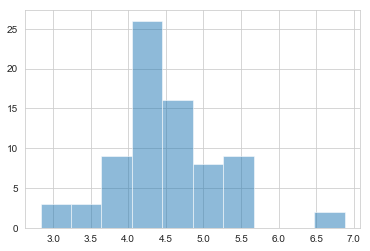

In [54]:
# df_uptown = df[df['Uptown'] == 1].copy()
# plt.hist(df_uptown['log_price'], alpha = 0.5)

# df_westside = df[df['Westside'] == 1].copy()
# plt.hist(df_westside['log_price'], alpha = 0.5)


df_zip = df[df['Uptown'] == 1].copy()
plt.hist(df_zip['log_price'], alpha = 0.5)